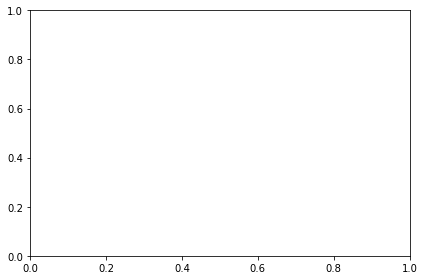

In [1]:
import matplotlib.pyplot as plt


class LineDrawer(object):
    lines = []
    def draw_line(self, startx,starty):
        ax = plt.gca()
        xy = plt.ginput(1)
        x = [startx,xy[0][0]]
        y = [starty,xy[0][1]]
        line = plt.plot(x,y)
        ax.figure.canvas.draw()

        self.lines.append(line)


def onclick(event):
    if event.dblclick:
        if event.button == 1:
            # Draw line
            ld = LineDrawer()
            ld.draw_line(event.xdata,event.ydata) # here you click on the plot
        elif event.button == 3:
            # Write to figure
            plt.figtext(3, 8, 'boxed italics text in data coords', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
            circ = plt.Circle((event.xdata, event.ydata), radius=0.07, color='g')
            ax.add_patch(circ)
            ax.figure.canvas.draw()
        else:
            pass # Do nothing


def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    print ('onpick points:', zip(xdata[ind], ydata[ind]))



fig, ax = plt.subplots()

connection_id = fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('pick_event', onpick)


plt.tight_layout()

plt.show()